In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv
from sympy import *
import math

In [2]:
train_set = []
with open('test-Minimum-Error-Rate-Classifier.txt','r') as file:
    new_reader = csv.reader(file,delimiter=',')
    for row in new_reader:
        train_set.append(row)

In [3]:
for i in range(len(train_set)):
    for j in range(len(train_set[i])):
        train_set[i][j] = float(train_set[i][j])

In [4]:
x = []
for train in train_set:
    x.append([train[0], train[1]])
x=np.array(x)
x

array([[ 1. ,  1. ],
       [ 1. , -1. ],
       [ 4. ,  5. ],
       [-2. ,  2.5],
       [ 0. ,  2. ],
       [ 2. , -3. ]])

In [5]:
mu1=np.array([0,0])
sigma1 = np.array([[.25,.3],[.3,1]])
p_class1 = 0.5

mu2 = np.array([2, 2])
sigma2 = np.array([[.5,0],[0,.5]])
p_class2 = 0.5

### Classifying All Sample Points

In [6]:
class1 = []
class2 = []

for i in range(len(x)):
    d1 = x[i,:]-mu1
    a1 = 1 / (((2 * np.pi) ** (2/2)) * (np.linalg.det(sigma1)**(1/2)))
    expon1 = np.exp(-(1/2) * np.matmul(np.transpose(d1), np.matmul(np.linalg.inv(sigma1), d1)))
    likelihood1 = a1*expon1
    g1 = likelihood1*p_class1
    
    d2 = x[i,:]-mu2
    a2 = 1 / (((2 * np.pi) ** (2/2)) * (np.linalg.det(sigma2)**(1/2)))
    expon2 = np.exp(-(1/2) * np.matmul(np.transpose(d2), np.matmul(np.linalg.inv(sigma2), d2)))
    likelihood2 = a2*expon2
    g2 = likelihood2*p_class2
    
    if g1>g2:
        class1.append(x[i,:])
    else:
        class2.append(x[i,:])

In [7]:
class1 = np.array(class1)
class2 = np.array(class2)
print("Class 1: ", class1)
print("Class 2: ", class2)

Class 1:  [[ 1.  1.]
 [ 1. -1.]
 [ 0.  2.]]
Class 2:  [[ 4.   5. ]
 [-2.   2.5]
 [ 2.  -3. ]]


### Plotting All Sample Points

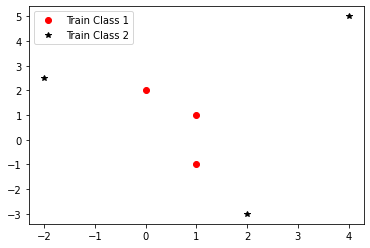

In [8]:
plt.plot(class1[:,0:1],class1[:, 1:], linestyle = '', marker='o', color='r', label ="Train Class 1")
plt.plot(class2[:,0:1],class2[:, 1:], linestyle = '', marker = '*', color = 'k', label ="Train Class 2")
plt.legend()
plt.show()

### Contour Plotting

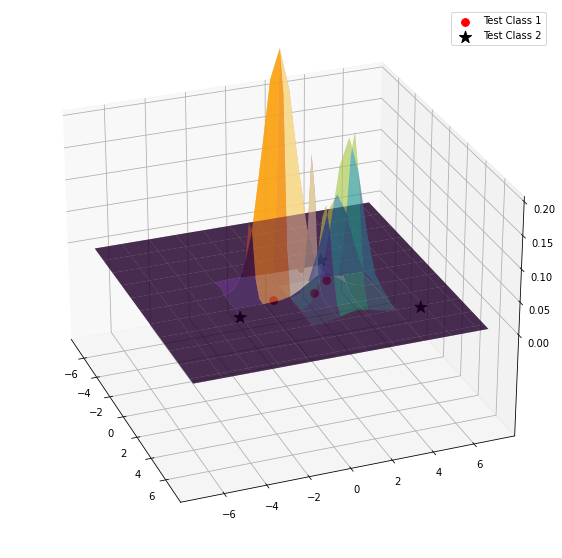

In [10]:
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

# Our 2-dimensional distribution will be over variables X and Y
N = 32
X = np.linspace(-7, 7, N)
Y = np.linspace(-7, 7, N)
X, Y = np.meshgrid(X, Y)

# Pack X and Y into a single 3-dimensional array
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y
# print(X)

def multivariate_gaussian(pos, mu, Sigma):
    n = mu.shape[0]
    Sigma_det = np.linalg.det(Sigma)
    Sigma_inv = np.linalg.inv(Sigma)
    N = np.sqrt((2*np.pi)**n * Sigma_det)
    fac = np.einsum('...k,kl,...l->...', pos-mu, Sigma_inv, pos-mu)
    return np.exp(-fac / 2) / N

Z1 = multivariate_gaussian(pos, mu1, sigma1)
# print(mu.shape[0])
Z2 = multivariate_gaussian(pos, mu2, sigma2)
# Create a surface plot and projected filled contour plot under it.
fig = plt.figure()
ax = fig.gca(projection='3d')

ax.scatter(class1[:,0], class1[:,1], marker='o', c='red',s=60,label='Test Class 1',alpha= 1.0)
ax.scatter(class2[:,0], class2[:,1], marker='*', c='black',s=160,label='Test Class 2',alpha= 1.0)


ax.plot_surface(X, Y, Z1, rstride=3, cstride=3, linewidth=1, antialiased=True,
                cmap=cm.inferno, alpha= .7)
ax.plot_surface(X, Y, Z2, rstride=3, cstride=3, linewidth=1, antialiased=True,
                cmap=cm.viridis, alpha= .4)

ax.legend()

# Adjust the limits, ticks and view angle
ax.set_zlim(-0.15,0.2)
ax.set_zticks(np.linspace(0,0.2,5))
ax.view_init(27, -21)

plt.rcParams["figure.figsize"] = (20,10)
plt.show()

### Drawing Decision Boundary

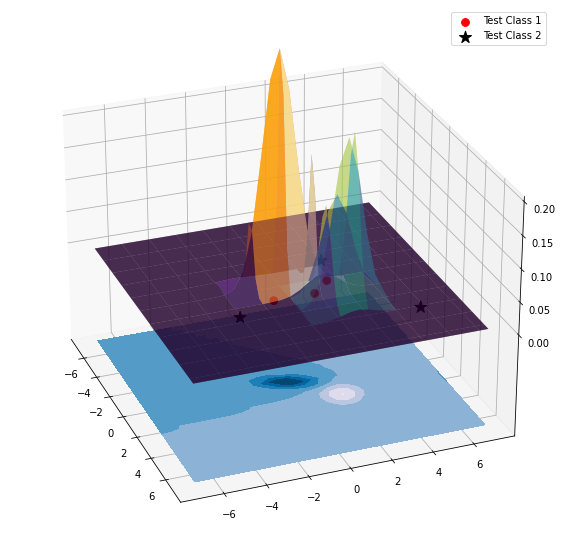

In [11]:
# Our 2-dimensional distribution will be over variables X and Y
N = 32
X = np.linspace(-7, 7, N)
Y = np.linspace(-7, 7, N)
X, Y = np.meshgrid(X, Y)

# Pack X and Y into a single 3-dimensional array
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y
# print(X)

def multivariate_gaussian(pos, mu, Sigma):
    n = mu.shape[0]
    Sigma_det = np.linalg.det(Sigma)
    Sigma_inv = np.linalg.inv(Sigma)
    N = np.sqrt((2*np.pi)**n * Sigma_det)
    fac = np.einsum('...k,kl,...l->...', pos-mu, Sigma_inv, pos-mu)
    return np.exp(-fac / 2) / N

Z1 = multivariate_gaussian(pos, mu1, sigma1)
# print(mu.shape[0])
Z2 = multivariate_gaussian(pos, mu2, sigma2)
# Create a surface plot and projected filled contour plot under it.
fig = plt.figure()
ax = fig.gca(projection='3d')
db=Z1-Z2

ax.scatter(class1[:,0], class1[:,1], marker='o', c='red',s=60,label='Test Class 1',alpha= 1.0)
ax.scatter(class2[:,0], class2[:,1], marker='*', c='black',s=160,label='Test Class 2',alpha= 1.0)


ax.plot_surface(X, Y, Z1, rstride=3, cstride=3, linewidth=1, antialiased=True,
                cmap=cm.inferno, alpha= .7)
ax.plot_surface(X, Y, Z2, rstride=3, cstride=3, linewidth=1, antialiased=True,
                cmap=cm.viridis, alpha= .4)
ax.contourf(X, Y, db, zdir='z', offset=-0.15, cmap=cm.PuBu )

ax.legend()

# Adjust the limits, ticks and view angle
ax.set_zlim(-0.15,0.2)
ax.set_zticks(np.linspace(0,0.2,5))
ax.view_init(27, -21)

plt.rcParams["figure.figsize"] = (20,10)
plt.show()